# Author: Kazi Amit Hasan

Department of Computer Science & Engineering, <br>
Rajshahi University of Engineering & Technology (RUET) <br>
Website: https://amithasanshuvo.github.io/ <br>
Linkedin: https://www.linkedin.com/in/kazi-amit-hasan-514443140/ <br>
Email: kaziamithasan89@gmail.com <br>


### Comment: 
This notebook represents the chapter two(2) of Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems book. I tried to implemented each examples while I was reading and practing this book. <br>
<b>Please give your feedback how I can improve the notebook and plase put a star on github to support. Happy Learning!


##### Reference 
Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems book (The best book I ever got on Data Sciene <3) <br>

Language: Python

##### Topics Covered:
1. Downloading and playing with the dataset
2. Data Visualization
3. Correaltion Analysis
4. Data Cleaning and Handling Missing Values
5. Handling text and Categorical attributes



##### Todo list:
1. Feature Scaling
2. Pipelines
3. Train and Evaluating
4. Cross Validation
5. Tuning
6. Grid Search
7. Randomized Search
8. Ensemble method
9. Do the exercises

## Downloading and playing with the dataset

In [39]:
#Getting the dataset
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [40]:
fetch_housing_data()

In [41]:

import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [42]:
#Showing the first 5 rows
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [43]:
#info of dataset
housing.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
7        -122.25     37.84                52.0       3104.0           687.0   
8        -122.26     37.84                42.0       2555.0           665.0   
9        -122.25     37.84                52.0       3549.0           707.0   
10       -122.26     37.85                52.0       2202.0           434.0   
11       -122.26    

In [44]:
#Value counts of ocean_proximity column
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [45]:
#shape of our data
housing.shape

(20640, 10)

In [46]:
#Summary of each numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [47]:
#Showwing the correlations
housing.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [48]:
#Showing the columns
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

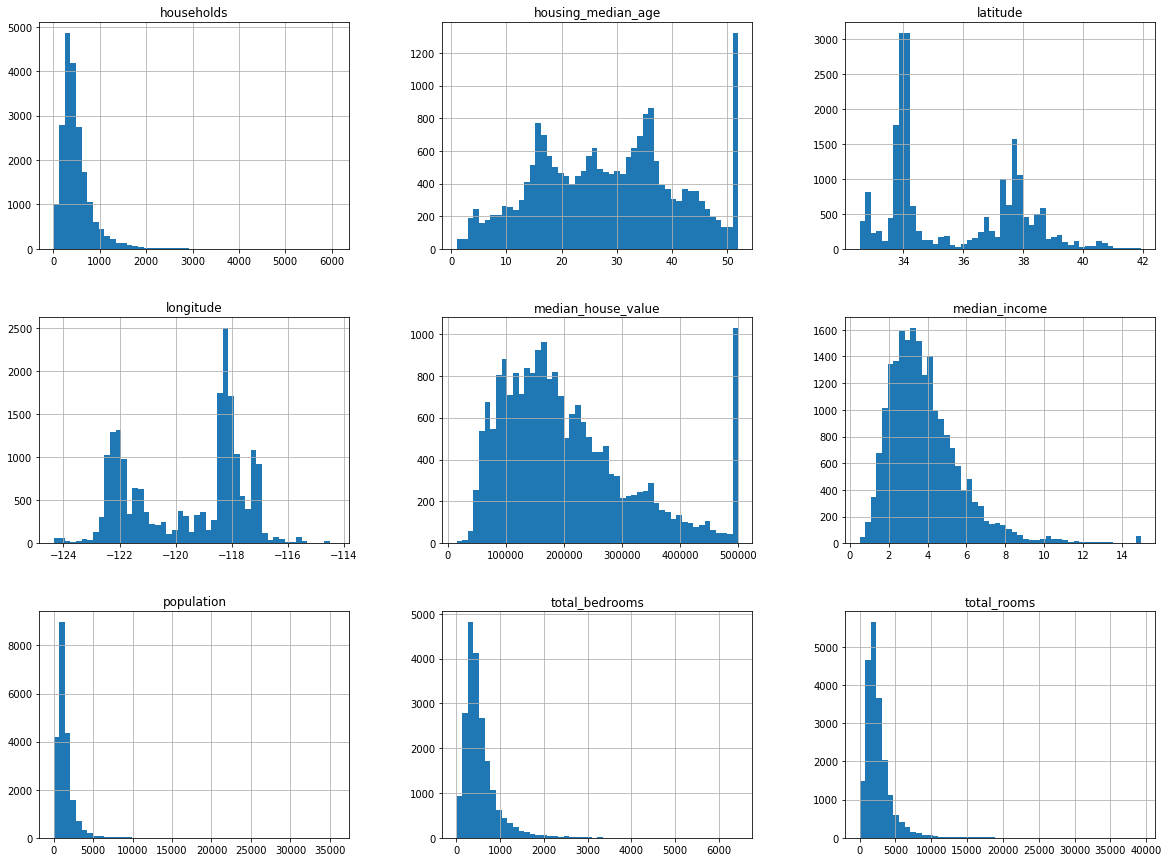

In [49]:
#Plotting histograms for each numerical attributes
%matplotlib inline

import matplotlib.pyplot as plt
housing.hist(bins =50, figsize=(20,15))

plt.show()

#Slighly over 1000 distrcts have a median_house_value about 500000 usd

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13285f6d8>]],
      dtype=object)

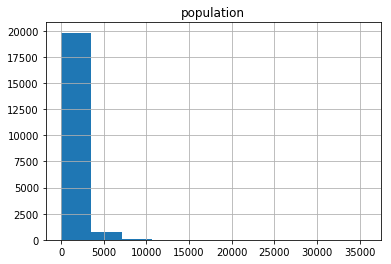

In [50]:
housing.hist(column='population')


In [51]:
# random_state parameter always generate the same shuffle indices. If the dataset 
# is not big enough then there's a chance of sampling bias
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)



## Data Visualization

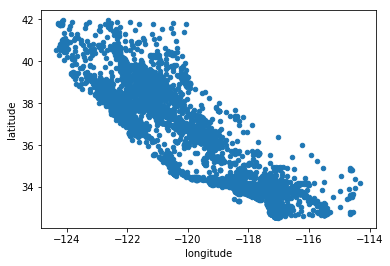

In [52]:
# Geographical data of all districts
housing.plot (kind ='scatter', x='longitude', y= 'latitude')

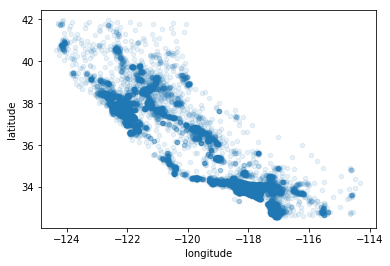

In [53]:
housing.plot (kind ='scatter', x='longitude', y= 'latitude', alpha = 0.1)
# adding alpha for better visualization. This helps to visualize the high density data points

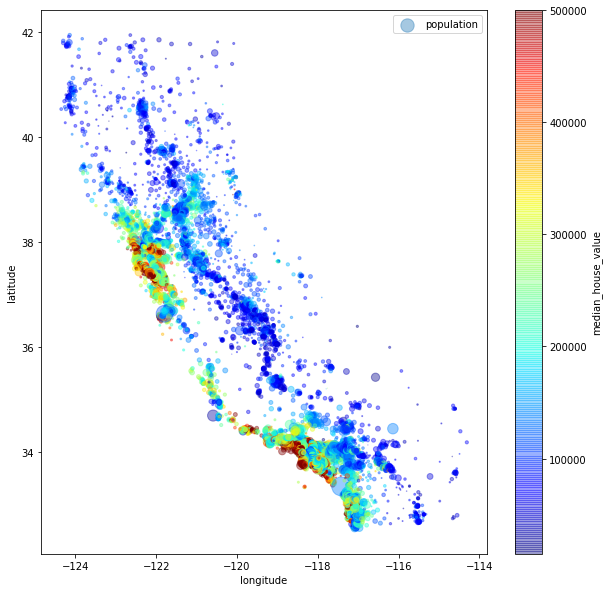

In [54]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,10),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

# This represents that housing prices are varies with locations and population density


## Correaltion Analysis

In [55]:
corr_matrix = housing.corr()

In [56]:
print (corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

In [57]:
# Correlation of median_house_value with other attributes
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x133ec0128>,
      dtype=object)

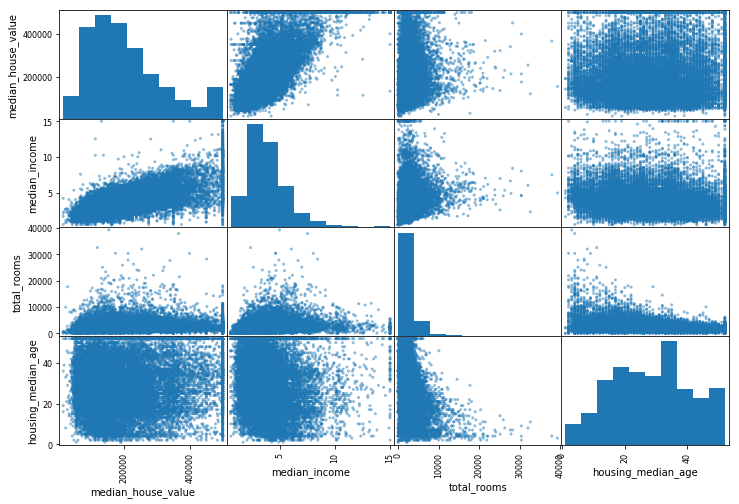

In [58]:
# another way to check correlation using pandas

from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes], figsize = (12,8))

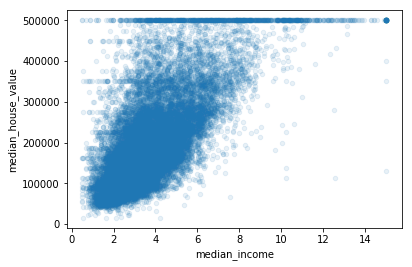

In [59]:
housing.plot (kind='scatter', x="median_income",y='median_house_value',alpha = 0.1)

# It means corr is very strong. 

In [60]:
# Creating new attributes

housing['room_per-_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_rooms'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [61]:
# Now the corr matrix will look something like this
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)


# This means bedrooms_per_room attributee is much more correlated with mediamn house value than total num of rooms
# Lower bedrooms has high price

median_house_value          1.000000
median_income               0.688075
room_per-_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_rooms         -0.255880
Name: median_house_value, dtype: float64

[0, 5, 0, 520000]

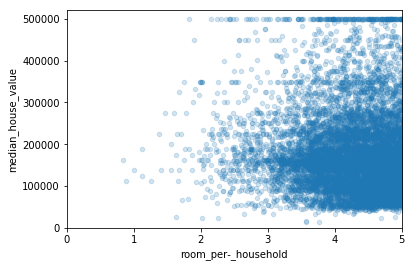

In [62]:
housing.plot(kind="scatter",
             x="room_per-_household",
             y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])



## Data Cleaning and Handling Missing Values

In [63]:
# Data Cleaning and handling missing values

#housing.dropna(subset=['total_bedrooms'])

# we can use this. but sklearn also provide e good function

In [66]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='median')


# this help to take care of missing values. 
# medians only be computed on numerical values ,so we need a copy of data without text attributes i.e ocean_proximity

In [68]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [74]:
imputer.fit(housing_num)
# fitting the imputer instances to training data. It only computed the median of each attributes.

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [75]:
housing_num.median().values


array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

In [72]:
X = imputer.transform(housing_num)

# Transforming the train set by replacing the missing values with new medians

In [78]:
imputer.strategy


'median'

In [81]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)

In [87]:
housing_tr.loc[housing_num.index.values]
# Putting back into Pandas df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_per-_household,bedrooms_per_rooms,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,4.761658,0.231774,2.139896
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,4.931907,0.192899,2.128405
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,4.797527,0.221327,1.788253
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,4.294118,0.260274,2.026891
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,4.970588,0.199211,2.172269


In [85]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [88]:
housing_tr.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_per-_household,bedrooms_per_rooms,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467


## Handling text and Categorical attributes

In [89]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [90]:
# Earlier we left the text attribute (ocean_proximity), now we have to work on that

# Converting them into labels

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [91]:
ordinal_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [94]:
# Convert int to categorical values into onehot vectors
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [95]:
housing_cat_1hot.toarray()


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])